<a href="https://colab.research.google.com/github/bill7845/project_brunchNetworking_streamlit/blob/master/modeling/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Colab에서 LightGBM을 GPU로 사용할 경우 

In [0]:
# !git clone https://github.com/Microsoft/LightGBM

In [0]:
# cd LightGBM

In [0]:
# !mkdir build

In [0]:
# !cmake -DUSE_GPU=1

In [0]:
# !make -j$(nproc)

In [0]:
# !sudo apt-get -y install python-pip

In [0]:
# !sudo -H pip install setuptools pandas numpy scipy scikit-learn -U

In [0]:
# %cd /content/LightGBM/python-package

In [0]:
# !sudo python setup.py install

In [0]:
################################################################## 

In [0]:
## sklearn 버전 번경
## 실행 후 런타임 재시작

In [0]:
# !pip3 uninstall scikit-learn

In [0]:
# !pip3 install scikit-learn==0.21.3

In [0]:
##################

In [0]:
## Colab에서 mecab 사용할 경우

In [0]:
# ! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [0]:
# cd Mecab-ko-for-Google-Colab/

In [0]:
# ! bash install_mecab-ko_on_colab190912.sh

In [0]:
####################

In [0]:
## library import
import pandas as pd
import json
import pickle
import os
import urllib.request
import re
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import classification_report

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl 
import matplotlib.font_manager as fm

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

## tfidf_vect_mecab_pos_mindf005 => mecab, pos(길이2이상명사) , min_df=0.05
## tfidf_vect_mecab_pos_len2 => mecab, pos(길이2이상명사)
## tfidf_vect_mecab_pos_ngram => mecab, posd(길이2이상명사), ngram(1,2)
## tfidf_vect_mecab_ngram_extraction => mecab, pos(길이2이상명사), ngram 추출법으로 차원줄임 , 빈도수10이상


path = '/content/drive/My Drive/Colab code/brunch_project/data/vect'

with open('/content/drive/My Drive/Colab code/brunch_project/data/vect/tfidf_train_matrix_mecab_pos_len2.pkl', 'rb') as f:
  tfidf_train_matrix = pickle.load(f) 
with open('/content/drive/My Drive/Colab code/brunch_project/data/vect/tfidf_test_matrix_mecab_pos_len2.pkl', 'rb') as f:
  tfidf_test_matrix = pickle.load(f)
# with open('/content/drive/My Drive/Colab code/brunch_project/data/vect/tfidf_val_matrix_mecab_pos_len2.pkl', 'rb') as f:
  # tfidf_val_matrix = pickle.load(f)

with open('/content/drive/My Drive/Colab code/brunch_project/data/vect/y_train.pkl', 'rb') as f:
  y_train = pickle.load(f)
with open('/content/drive/My Drive/Colab code/brunch_project/data/vect/y_test.pkl', 'rb') as f:
  y_test = pickle.load(f)
# with open('/content/drive/My Drive/Colab code/brunch_project/data/vect/y_val.pkl', 'rb') as f:
  # y_val = pickle.load(f)

In [0]:
## top_n error
## 예측한 최상위 2개 범주 가운데 정답이 없는 경우의 오류율
def top_n_error(model, y_test_proba, y_test, top_n=2):

  top_n_pred = np.argsort(y_test_proba, axis=1)[:, -top_n:]
  class_labels = model.classes_
  
  true_score = 0
  for i in range(len(y_test)):
    if y_test.iloc[i] not in class_labels[top_n_pred][i]:
      true_score += 1
    else :
      pass
  
  error_rate = true_score / len(y_test)

  print("Top_"+str(top_n)+" Error : ",error_rate)

  return error_rate


In [15]:
## LightGBM
from lightgbm import LGBMClassifier

# {'max_depth': 256, 'min_child_samples': 200, 'num_leaves': 128, 'subsample': 0.5}
# lgbm_model = LGBMClassifier(n_estimators=50,
#                        objective='multiclass',
#                        num_class=18,
#                        device='gpu',
#                        max_depth=256,
#                        min_child_samples=200,
#                        num_leaves=128,
#                        subsample=0.8,
#                        learning_rate=0.03)

# lgbm_model.fit(tfidf_train_matrix, y_train)

# path = '/content/drive/My Drive/Colab code/brunch_project/data/model_weight'
# pickle.dump(lgbm_model, open(os.path.join(path,'classifier_lgbm.pkl'),'wb'),protocol=4)

# with open('/content/drive/My Drive/Colab code/brunch_project/data/model_weight/classifier_lgbm.pkl', 'rb') as f:
#   lgbm_model = pickle.load(f)

# pred_lgbm = lgbm_model.predict(tfidf_test_matrix)
# pred_lgbm_proba = lgbm_model.predict_proba(tfidf_test_matrix)

# print("classification report", classification_report(y_test,pred_lgbm))
# print("accuracy : ",accuracy_score(y_test,pred_lgbm))
# print("f1_score : ",f1_score(y_test,pred_lgbm, average='macro'))
top_2_error = top_n_error(lgbm_model ,pred_lgbm_proba, y_test, top_n=3)
print(top_2_error)

Top_3 Error :  0.09602128085581076
0.09602128085581076


In [4]:
# logistic Regression

from sklearn.linear_model import LogisticRegression

# lg_model = LogisticRegression(C=1,multi_class='multinomial',solver='lbfgs')
# lg_model.fit(tfidf_train_matrix,y_train)

# path = '/content/drive/My Drive/Colab code/brunch_project/data/model_weight'
# pickle.dump(lg_model, open(os.path.join(path,'classifier_lg.pkl'),'wb'),protocol=4)

with open('/content/drive/My Drive/Colab code/brunch_project/data/model_weight/classifier_lg.pkl', 'rb') as f:
  lg_model = pickle.load(f)

pred_logistic = lg_model.predict(tfidf_test_matrix)
pred_logistic_proba = lg_model.predict_proba(tfidf_test_matrix)

print("classification report", classification_report(y_test,pred_logistic))
print("accuracy : ",accuracy_score(y_test,pred_logistic))
print("f1_score : ",f1_score(y_test,pred_logistic, average='macro'))
top_2_error = top_n_error(lg_model ,pred_logistic_proba, y_test, top_n=2)

classification report               precision    recall  f1-score   support

           0       0.79      0.82      0.81      2842
           1       0.82      0.83      0.83       839
           2       0.84      0.84      0.84      1312
           3       0.68      0.57      0.62      1585
           4       0.70      0.57      0.63       764
           5       0.69      0.60      0.64      1294
           6       0.74      0.72      0.73      1063
           7       0.90      0.88      0.89      1668
           8       0.68      0.69      0.68      2934
           9       0.44      0.53      0.48      2941
          10       0.82      0.85      0.83      2578
          11       0.74      0.69      0.71      1479
          12       0.83      0.81      0.82      1918
          13       0.82      0.84      0.83      2634
          14       0.68      0.67      0.68      3022
          15       0.84      0.83      0.83      1871
          16       0.73      0.69      0.71      2205
     

In [12]:
print(classification_report(y_test,pred_logistic))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2842
           1       0.82      0.83      0.83       839
           2       0.84      0.84      0.84      1312
           3       0.68      0.57      0.62      1585
           4       0.70      0.57      0.63       764
           5       0.69      0.60      0.64      1294
           6       0.74      0.72      0.73      1063
           7       0.90      0.88      0.89      1668
           8       0.68      0.69      0.68      2934
           9       0.44      0.53      0.48      2941
          10       0.82      0.85      0.83      2578
          11       0.74      0.69      0.71      1479
          12       0.83      0.81      0.82      1918
          13       0.82      0.84      0.83      2634
          14       0.68      0.67      0.68      3022
          15       0.84      0.83      0.83      1871
          16       0.73      0.69      0.71      2205
          17       0.78    

Confusion matrix, without normalization


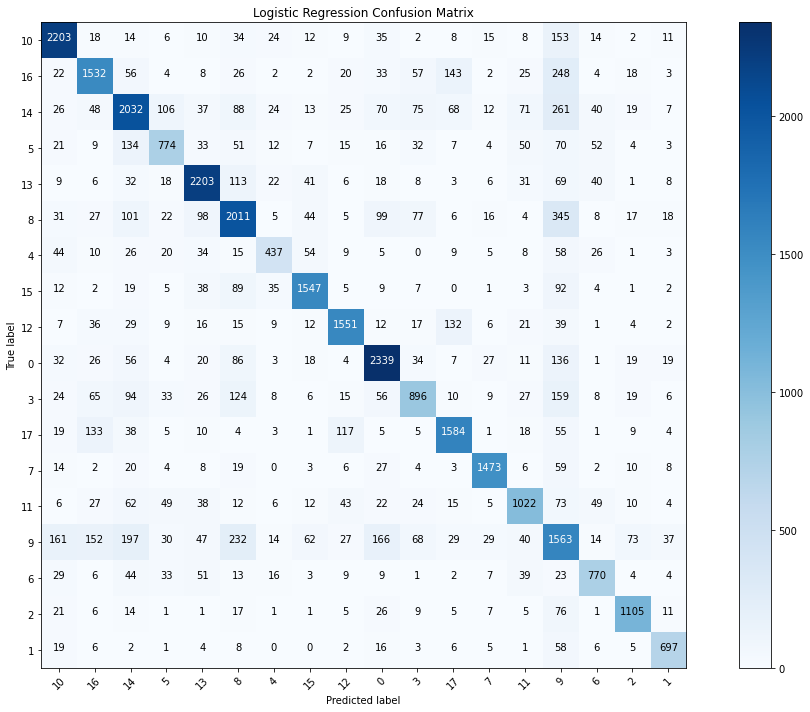

In [10]:
# lg_confusion_matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Logistic Regression Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

classes = list(y_test.unique())
cnf_matrix = confusion_matrix(y_test, pred_logistic, labels=classes)
np.set_printoptions(precision=2)

plt.figure(figsize=(13,10))
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Logistic Regression Confusion Matrix')

In [19]:
from sklearn.naive_bayes import MultinomialNB


# nb_model = MultinomialNB(alpha=0.01)

# nb_model.fit(tfidf_train_matrix,y_train)

# path = '/content/drive/My Drive/Colab code/brunch_project/data/model_weight'
# pickle.dump(nb_model, open(os.path.join(path,'classifier_nb.pkl'),'wb'),protocol=4)

with open('/content/drive/My Drive/Colab code/brunch_project/data/model_weight/classifier_nb.pkl', 'rb') as f:
  nb_model = pickle.load(f)

pred_nb = nb_model.predict(tfidf_test_matrix)
pred_nb_proba = nb_model.predict_proba(tfidf_test_matrix)

print("classification report", classification_report(y_test,pred_nb))
print("accuracy : ",accuracy_score(y_test,pred_nb))
print("f1_score : ",f1_score(y_test,pred_nb, average='macro'))

top_2_error = top_n_error(nb_model ,pred_nb_proba, y_test, top_n=3)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


classification report               precision    recall  f1-score   support

           0       0.74      0.76      0.75      2842
           1       0.76      0.84      0.79       839
           2       0.87      0.76      0.81      1312
           3       0.59      0.50      0.54      1585
           4       0.67      0.48      0.56       764
           5       0.58      0.55      0.56      1294
           6       0.70      0.69      0.70      1063
           7       0.90      0.81      0.85      1668
           8       0.59      0.63      0.61      2934
           9       0.40      0.41      0.41      2941
          10       0.77      0.86      0.81      2578
          11       0.71      0.63      0.66      1479
          12       0.78      0.77      0.77      1918
          13       0.78      0.82      0.80      2634
          14       0.60      0.61      0.60      3022
          15       0.83      0.78      0.81      1871
          16       0.65      0.68      0.66      2205
     

In [17]:
from sklearn.ensemble import RandomForestClassifier

# rf_model = RandomForestClassifier(n_estimators=100, max_depth=512, min_samples_leaf=1, min_samples_split=16, n_jobs=-1)
# rf_model.fit(tfidf_train_matrix,y_train)

# path = '/content/drive/My Drive/Colab code/brunch_project/data/model_weight'
# pickle.dump(rf_model, open(os.path.join(path,'classifier_rf.pkl'),'wb'),protocol=4)

with open('/content/drive/My Drive/Colab code/brunch_project/data/model_weight/classifier_rf.pkl', 'rb') as f:
  rf_model = pickle.load(f)

pred_rf = rf_model.predict(tfidf_test_matrix)
pred_rf_proba = rf_model.predict_proba(tfidf_test_matrix)

print("classification report", classification_report(y_test,pred_rf))
print("accuracy : ",accuracy_score(y_test,pred_rf))
print("f1_score : ",f1_score(y_test,pred_rf, average='macro'))
top_2_error = top_n_error(rf_model ,pred_rf_proba, y_test, top_n=3)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


classification report               precision    recall  f1-score   support

           0       0.64      0.85      0.73      2842
           1       0.79      0.78      0.79       839
           2       0.87      0.72      0.79      1312
           3       0.76      0.38      0.51      1585
           4       0.83      0.19      0.31       764
           5       0.73      0.41      0.52      1294
           6       0.74      0.52      0.61      1063
           7       0.87      0.84      0.85      1668
           8       0.59      0.67      0.63      2934
           9       0.43      0.24      0.30      2941
          10       0.67      0.89      0.76      2578
          11       0.71      0.55      0.62      1479
          12       0.74      0.76      0.75      1918
          13       0.69      0.88      0.77      2634
          14       0.57      0.68      0.62      3022
          15       0.77      0.84      0.81      1871
          16       0.63      0.72      0.67      2205
     

In [0]:
###########################################################################################

In [0]:
## RandomForest gridSearch

# from sklearn.ensemble import RandomForestClassifier

# rf_params = {'n_estimators':[100],
#              'max_depth':[512],
#              'min_samples_leaf':[2],
#              'min_samples_split':[16]
#              }

# model_rf = RandomForestClassifier(n_jobs=-1,)
# grid_rf = GridSearchCV(model_rf, param_grid=rf_params, cv=2, n_jobs=-1)
# grid_rf.fit(tfidf_train_matrix,y_train)

# print(grid_rf.best_params_)

{'max_depth': 512, 'min_samples_leaf': 2, 'min_samples_split': 16, 'n_estimators': 100}


In [0]:
# LightGBM gridSearch

# {'max_depth': 160, 'min_child_samples': 100, 'num_leaves': 64, 'subsample': 0.8}
# {'max_depth': 256, 'min_child_samples': 200, 'num_leaves': 128, 'subsample': 0.8}
# {'max_depth': 256, 'min_child_samples': 200, 'num_leaves': 128, 'subsample': 0.8}

# from sklearn.model_selection import GridSearchCV
# from lightgbm import LGBMClassifier
# from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
# from sklearn.metrics import classification_report

# model = LGBMClassifier(n_estimators=100, objective='multiclass', num_class=18,device='gpu')

# param_grid = {
#     'max_depth': [256],
#     'num_leaves': [128],
#     'min_child_samples': [200,250],
#     'subsample': [0.8],
# }

# gridcv = GridSearchCV(model, param_grid=param_grid, cv=2)
# gridcv.fit(tfidf_train_matrix, y_train, early_stopping_rounds=30, eval_metric='softmax', eval_set=[(tfidf_train_matrix,y_train),(tfidf_val_matrix,y_val)])

# print(gridcv.best_score_)
# print(gridcv.best_params_)

# pred = gridcv.predict(tfidf_test_matrix)

# print("classification report", classification_report(y_test,pred))
# print("accuracy : ",accuracy_score(y_test,pred))
# print("f1_score : ",f1_score(y_test,pred, average='macro'))

# path = '/content/drive/My Drive/Colab code/brunch_project/data/model_weight'
# pickle.dump(gridcv, open(os.path.join(path,'classifier_lgbm_grid.pkl'),'wb'),protocol=4)